<a href="https://colab.research.google.com/github/Shirui-peng/udlbook/blob/main/Notebooks/Chap07/7_4_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

In [2]:
# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 5
# create model with two hidden layers
model = nn.Sequential(
  nn.Linear(D_i, D_k),
  nn.ReLU(),
  nn.Linear(D_k, D_k),
  nn.ReLU(),
  nn.Linear(D_k, D_o))

In [3]:
# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_normal_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)
model.apply(weights_init)

Sequential(
  (0): Linear(in_features=10, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=5, bias=True)
)

In [4]:
# choose least squares loss function
criterion = nn.MSELoss()
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [5]:
# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y = torch.randn(100, D_o)
data_loader = DataLoader(TensorDataset(x,y), batch_size=10, shuffle=True)

In [7]:
all_losses = []
# loop over the dataset 100 times
for epoch in range(100):
  epoch_loss = 0.0
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(x_batch)
    loss = criterion(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()
    # update statistics
    epoch_loss += loss.item()
  # print error
  print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
  # tell scheduler to consider updating learning rate
  scheduler.step()
  all_losses.append(epoch_loss)

Epoch     0, loss 4.803
Epoch     1, loss 4.803
Epoch     2, loss 4.803
Epoch     3, loss 4.803
Epoch     4, loss 4.803
Epoch     5, loss 4.802
Epoch     6, loss 4.802
Epoch     7, loss 4.802
Epoch     8, loss 4.802
Epoch     9, loss 4.802
Epoch    10, loss 4.802
Epoch    11, loss 4.802
Epoch    12, loss 4.802
Epoch    13, loss 4.802
Epoch    14, loss 4.802
Epoch    15, loss 4.802
Epoch    16, loss 4.802
Epoch    17, loss 4.802
Epoch    18, loss 4.802
Epoch    19, loss 4.802
Epoch    20, loss 4.801
Epoch    21, loss 4.801
Epoch    22, loss 4.801
Epoch    23, loss 4.801
Epoch    24, loss 4.801
Epoch    25, loss 4.801
Epoch    26, loss 4.801
Epoch    27, loss 4.801
Epoch    28, loss 4.801
Epoch    29, loss 4.801
Epoch    30, loss 4.801
Epoch    31, loss 4.801
Epoch    32, loss 4.801
Epoch    33, loss 4.801
Epoch    34, loss 4.801
Epoch    35, loss 4.801
Epoch    36, loss 4.801
Epoch    37, loss 4.801
Epoch    38, loss 4.801
Epoch    39, loss 4.801
Epoch    40, loss 4.801
Epoch    41, los

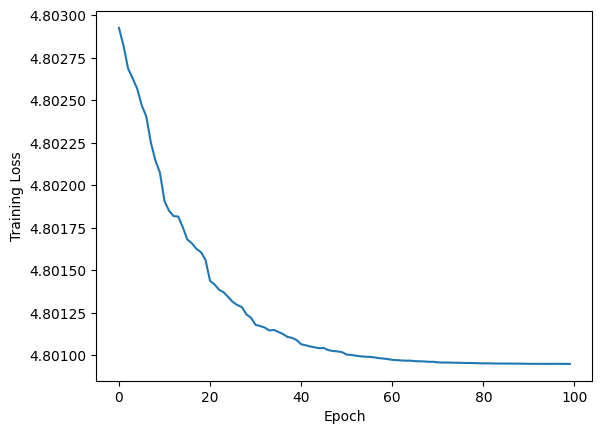

In [8]:
# plot the training loss as a function of the number of epochs
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.plot(np.arange(0, 100), np.array(all_losses))

In [11]:
# change the targets y so they are binary
y = torch.bernoulli(torch.rand(100, D_o))

# create model with two hidden layers to predict numbers between zero and one
model = nn.Sequential(
  nn.Linear(D_i, D_k),
  nn.ReLU(),
  nn.Linear(D_k, D_k),
  nn.ReLU(),
  nn.Linear(D_k, D_o),
  nn.Sigmoid())

# choose the loss function appropriately
criterion = nn.BCELoss()

In [13]:
data_loader = DataLoader(TensorDataset(x,y), batch_size=10, shuffle=True)
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

all_losses = []
# loop over the dataset 100 times
for epoch in range(100):
  epoch_loss = 0.0
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(x_batch)
    loss = criterion(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()
    # update statistics
    epoch_loss += loss.item()
  # print error
  print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
  # tell scheduler to consider updating learning rate
  scheduler.step()
  all_losses.append(epoch_loss)

Epoch     0, loss 4.032
Epoch     1, loss 4.134
Epoch     2, loss 4.083
Epoch     3, loss 3.934
Epoch     4, loss 3.615
Epoch     5, loss 3.516
Epoch     6, loss 3.166
Epoch     7, loss 3.166
Epoch     8, loss 3.191
Epoch     9, loss 3.076
Epoch    10, loss 2.534
Epoch    11, loss 2.156
Epoch    12, loss 2.129
Epoch    13, loss 1.915
Epoch    14, loss 1.836
Epoch    15, loss 1.718
Epoch    16, loss 1.623
Epoch    17, loss 1.585
Epoch    18, loss 1.470
Epoch    19, loss 1.355
Epoch    20, loss 1.223
Epoch    21, loss 1.178
Epoch    22, loss 1.134
Epoch    23, loss 1.123
Epoch    24, loss 1.052
Epoch    25, loss 1.033
Epoch    26, loss 0.994
Epoch    27, loss 0.974
Epoch    28, loss 0.934
Epoch    29, loss 0.926
Epoch    30, loss 0.874
Epoch    31, loss 0.861
Epoch    32, loss 0.852
Epoch    33, loss 0.837
Epoch    34, loss 0.830
Epoch    35, loss 0.818
Epoch    36, loss 0.803
Epoch    37, loss 0.793
Epoch    38, loss 0.778
Epoch    39, loss 0.765
Epoch    40, loss 0.751
Epoch    41, los

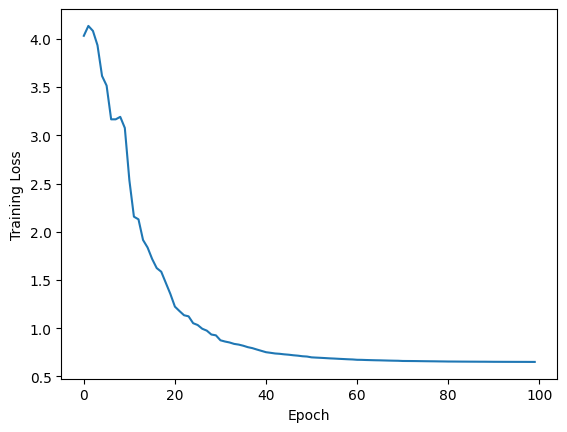

In [14]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.plot(np.arange(0, 100), np.array(all_losses))